In [ ]:
#LUCAS-KANADE SPARSE MOTION VECTOR
import numpy as np
import cv2

cap = cv2.VideoCapture('/Users/danilo/Desktop/DANCE_DS_byClass/fragility/dancer_1/20170113_t008_segm01.mpeg')
# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )
# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Create some random colors
color = np.random.randint(0,255,(100,3))
# Take first frame and find corners in it
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)
# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)

while(1):
    ret, frame = cap.read()
    if not ret: break
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
    # Select good points
    good_new = p1[st==1]
    good_old = p0[st==1]
    # draw the tracks
    for i,(new,old) in enumerate(zip(good_new,good_old)):
        a,b = new.ravel()
        c,d = old.ravel()
        mask = cv2.line(mask, (a,b),(c,d), color[i].tolist(), 2)
        frame = cv2.circle(frame,(a,b),5,color[i].tolist(),-1)
    img = cv2.add(frame,mask)
    cv2.imshow('frame',img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
    # Now update the previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1,1,2)
    
cv2.waitKey(0)
cap.release()
cv2.destroyAllWindows()

In [ ]:
#FARNERBACK DENSE MOTION-VECTOR
import cv2
import numpy as np
cap = cv2.VideoCapture('Video/representative/Lightness/Video attached to the ICMI 2017 Paper - Lightness.mp4')
ret, frame1 = cap.read()
prvs = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[...,1] = 255
while True:
    ret, frame2 = cap.read()
    if not ret: break
    next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
    flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
    bgr = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
    cv2.imshow('frame2',bgr)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
    elif k == ord('s'):
        cv2.imwrite('opticalfb.png',frame2)
        cv2.imwrite('opticalhsv.png',bgr)
    prvs = next
cap.release()
cv2.destroyAllWindows()

In [ ]:
#BACKGROUND SUBTRACTOR 
import numpy as np
import cv2
cap = cv2.VideoCapture('/Users/danilo/Desktop/DANCE_DS_byClass/fragility/dancer_1/20170113_t008_segm01.mpeg')
fgbg = cv2.bgsegm.createBackgroundSubtractorMOG()
#fgbg = cv2.createBackgroundSubtractorMOG2()
#fourcc = cv2.VideoWriter_fourcc(*'MPEG')
#ret, frame = cap.read()
#out = cv2.VideoWriter('sample.mpeg', fourcc, cap.get(cv2.CAP_PROP_FPS), (frame.shape[0],frame.shape[1]))
while True:
    ret, frame = cap.read()
    if not ret: break
    fgmask = fgbg.apply(frame)
    #out.write(fgmask)
    cv2.imshow('frame',fgmask)
    if cv2.waitKey(1) & 0xff == ord('q'): break

cap.release()
out.release()
cv2.destroyAllWindows()
#cv2.waitKey(1)

In [ ]:
#BACKGROUND SUBTRACTOR GMG
import numpy as np
import cv2

cap = cv2.VideoCapture('/Users/danilo/Desktop/DANCE_DS_byClass/fragility/dancer_1/20170113_t008_segm01.mpeg') 
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
fgbg = cv2.bgsegm.createBackgroundSubtractorGMG()

while(1):
    ret, frame = cap.read()
    fgmask = fgbg.apply(frame)
    fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)
    
    cv2.imshow('frame',fgmask)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()


In [2]:
import CV_utils as cvu
import numpy as np
import matplotlib.pyplot as plt
import sklearn.decomposition as sd
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.feature_extraction.image import reconstruct_from_patches_2d
import time
import pandas as pd
import multiprocessing
import cv2
%matplotlib inline
import sklearn.cluster as sc


In [3]:
l_b_frames, l_bgs_frames, l_c_frames, l_gs_frames = cvu.read_frames('Video/representative/Lightness/Video attached to the ICMI 2017 Paper - Lightness.mp4')

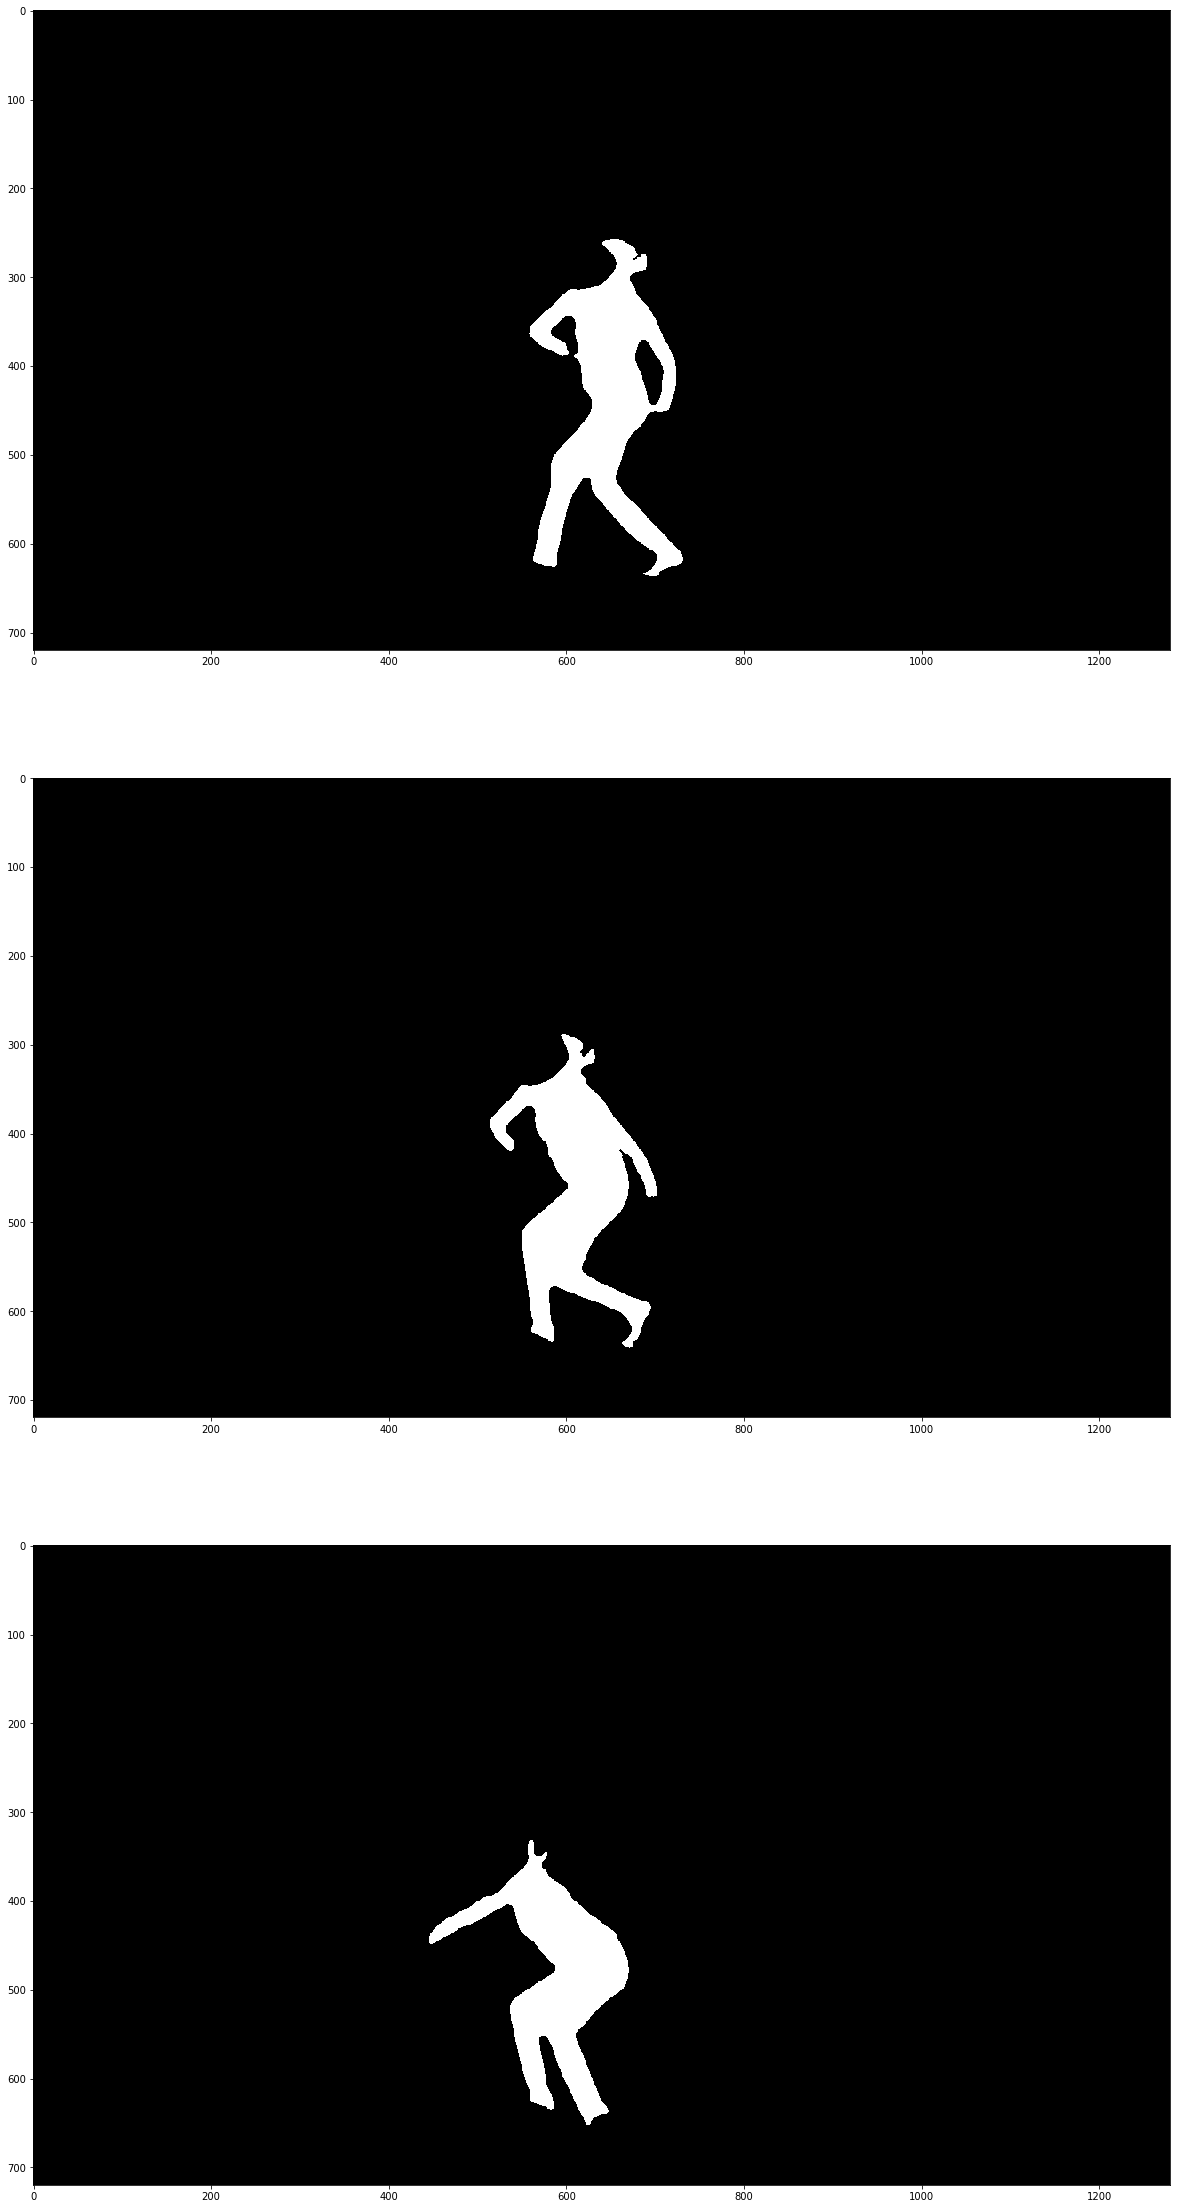

In [6]:
plt.figure(figsize=(40,40))
plt.subplot(311)
plt.imshow(l_b_frames[0],cmap='gray')
plt.subplot(312)
plt.imshow(l_b_frames[5],cmap='gray')

plt.subplot(313)
plt.imshow(l_b_frames[10],cmap='gray')
